# **Project Name**    - Zomato Unsupervised ML Cluster



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

This project analyzes customer reviews to extract sentiment insights and visualize key trends for both customers and the company. It clusters Zomato restaurants into meaningful segments, evaluates cuisine and cost patterns, and solves business cases to help customers find the best local restaurants while enabling companies to improve performance.

# **GitHub Link -**

https://github.com/shubham-j777/Labmentix_zomato

# **Problem Statement**


Zomato Unsupervised ML Cluster¶

Objective: The objective of this project is to conduct EDA , Clustering and Sentiment Analysis on two datasets related to Zomato, a popular restaurant discovery and food delivery platform. The analysis aims to gain insights into restaurant clustering and user sentiment towards different restaurants listed on Zomato.

Dataset 1: Zomato Restaurant's name and Metadata Details
Description: This dataset contains details of various restaurants listed on Zomato. It includes features such as restaurant name, links ,costs, collections, cuisines, timings.

Dataset 2: Zomato Restaurant Reviews
Description: This dataset contains user reviews for different restaurants on Zomato. It includes information such as the text of the review, reviewer, ratings, metadata, time, pictures.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#pip install wordcloud
#pip install contractions

In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import string
import re

### Dataset Loading

In [3]:
# Load Dataset
df_main = pd.read_csv("Zomato Restaurant names and Metadata.csv")
df_review = pd.read_csv("Zomato Restaurant reviews.csv")

#making copy of main for later use with destructive cleaning
df_main_copy = df_main.copy()

### Dataset First View

In [4]:
# Dataset First Look
df_main.head() 

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
df_review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count

In [7]:
df_main.shape

(105, 6)

In [8]:
df_review.shape

(10000, 7)

### Dataset Information

In [9]:
# Dataset Info

In [10]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


In [11]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count

In [13]:
print("Duplicate rows in Main:", df_main.duplicated().sum())

Duplicate rows in Main: 0


In [14]:
print("Duplicate rows in Review:", df_review.duplicated().sum())

Duplicate rows in Review: 36


#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count

In [16]:
print("Missing values in Main: ", df_main.isnull().sum())

Missing values in Main:  Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64


In [17]:
print("Missing values in Review: ", df_review.isnull().sum())

Missing values in Review:  Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


In [18]:
# Visualizing the missing values

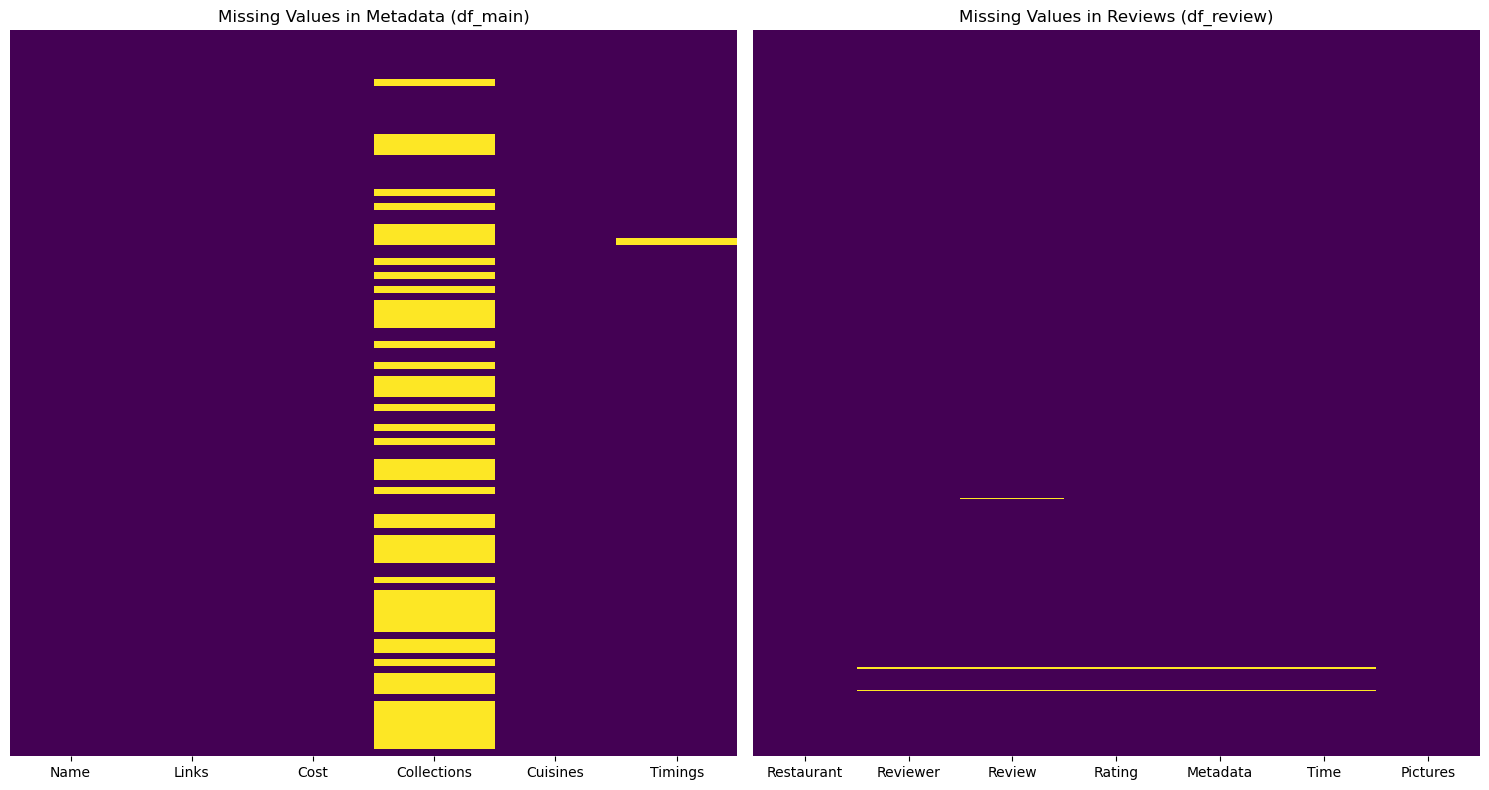

In [19]:
plt.figure(figsize=(15,8)) 
plt.subplot(1,2,1)
sns.heatmap(df_main.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values in Metadata (df_main)')
plt.subplot(1, 2, 2)
sns.heatmap(df_review.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values in Reviews (df_review)')
plt.tight_layout()
plt.show()

### What did you know about your dataset?

Duplicates:
df_main: 0 duplicates
df_review: 36 duplicates.

Missing Values:
df_main: The Collections column has 54 missing values

df_review: Columns like Reviewer, Review, Rating, Metadata, and Time have 38 missing values.

## ***2. Understanding Your Variables***

In [20]:
# Dataset Columns
print(df_main.columns)

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')


In [21]:
print(df_review.columns)

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [22]:
# Dataset Describe
df_main.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [23]:
df_review.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


### Variables Description

The df_main contains these columns/variables - 
'Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'

The df_review contains these columns/variables - 
'Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time','Pictures'

The cost column has commas so we need to remove/clean them.


### Check Unique Values for each variable.

In [24]:
# Check Unique Values for each variable.
df_main.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [25]:
df_review.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [26]:
# Write your code to make your dataset analysis ready.

Cleaning main data

In [27]:
# The 'Cost' column has commas (e.g., "1,200"). Remove them and make it numeric.
# We use .astype(str) first to handle any existing non-string types safely.
df_main['Cost'] = df_main['Cost'].astype(str).str.replace(',', '')
df_main['Cost'] = pd.to_numeric(df_main['Cost'], errors='coerce')

In [28]:
#Fill Missing Collections
df_main['Collections'] = df_main['Collections'].fillna('Not in Collection')

In [29]:
# Handle Missing Timings
df_main['Timings'] = df_main['Timings'].fillna('Not Available')

Cleaning review data

In [30]:
# Convert 'Time' to a proper datetime object for analysis
df_review['Time'] = pd.to_datetime(df_review['Time'], errors='coerce')

In [31]:
# Fix 'Like' and convert to numeric
df_review['Rating'] = df_review['Rating'].replace('Like', '4.0') # Assumption based on context
df_review['Rating'] = pd.to_numeric(df_review['Rating'], errors='coerce')

In [32]:
# A. Handle "Ghost" Rows
# Drop rows that have NO Rating AND NO Review text (useless data)
df_review.dropna(subset=['Rating', 'Review'], how='all', inplace=True)

# These are valid ratings where the user didn't write text.
# We fill them with a placeholder so they aren't null.
df_review['Review'] = df_review['Review'].fillna("No Review Text")

# B. Handle Missing Reviewer Names
# If the review is valid but name is missing, call them "Anonymous"
df_review['Reviewer'] = df_review['Reviewer'].fillna('Anonymous')

In [33]:
#Fill with Restaurant-Specific Median
restaurant_medians = df_review.groupby('Restaurant')['Rating'].transform('median')
df_review['Rating'] = df_review['Rating'].fillna(restaurant_medians)


In [34]:
#Parse Metadata
split_meta = df_review['Metadata'].str.split(',', expand=True)
df_review['Reviews_Count'] = pd.to_numeric(split_meta[0].str.extract(r'(\d+)')[0], errors='coerce')
df_review['Followers'] = pd.to_numeric(split_meta[1].str.extract(r'(\d+)')[0], errors='coerce')
df_review['Followers'] = df_review['Followers'].fillna(0)

In [35]:
# Merging both datasets 
df_merged = pd.merge(
    df_review, 
    df_main, 
    left_on='Restaurant', 
    right_on='Name', 
    how='left'
)

df_merged.drop(columns=['Name'], inplace=True)
df_merged.reset_index(drop=True, inplace=True)

# Final Check
print(df_merged.head())

        Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata                Time  Pictures  Reviews_Count  \
0   1 Review , 2 Followers 2019-05-25 15:54:00         0              1   
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0              3   
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0              2   
3    1 Review , 1 Follower 2019-05-24 22:11:00    

In [36]:
print(df_merged.isnull().sum())

Restaurant       0
Reviewer         0
Review           0
Rating           0
Metadata         0
Time             0
Pictures         0
Reviews_Count    0
Followers        0
Links            0
Cost             0
Collections      0
Cuisines         0
Timings          0
dtype: int64


### What all manipulations have you done and insights you found?

MANIPULATIONS (The Cleanup):

-Deleted rows that were totally empty.
-Fixed people who rated but didn't write anything; filled it with "No Review Text".
-Changed one rating from "Like" to 4.0.
-Filled missing ratings with that specific restaurant's median.
-Split "1 Review, 5 Followers" into two real number columns.
-Turned "1,200" into 1200 so we can do math on it.
-Merged the dataframe

INSIGHTS (What I Found):
-Only one place ("Pot Pourri") forgot to list their opening hours.
-People who hid their names mostly gave 5-star ratings

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [37]:
# Barplot , top 10 restaurants by Cost

C:\Users\shubh\AppData\Local\Temp\ipykernel_5788\2837787100.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


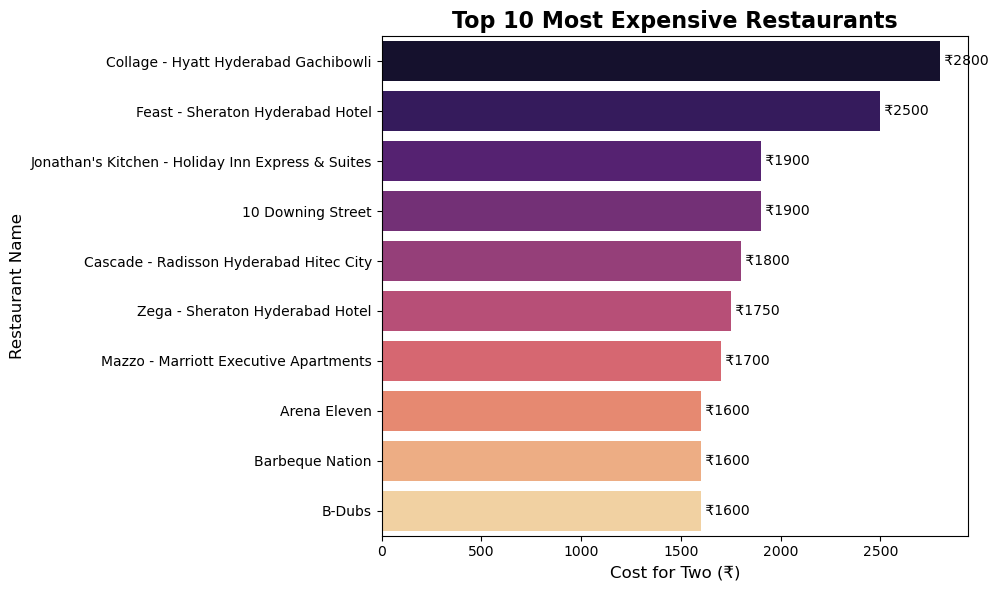

In [38]:
#Finding the top 10 restaurants by Cost
# Deduplicate to find unique restaurants and their costs
unique_restaurants = df_merged[['Restaurant', 'Cost']].drop_duplicates()

# Sort descending to find the most expensive ones
top_10_expensive = unique_restaurants.sort_values(by='Cost', ascending=False).head(10)

# Generate Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_expensive,
    x='Cost',
    y='Restaurant',
    palette='magma'
)

plt.title('Top 10 Most Expensive Restaurants', fontsize=16, weight='bold')
plt.xlabel('Cost for Two (₹)', fontsize=12)
plt.ylabel('Restaurant Name', fontsize=12)

# Add text labels to the bars
for index, value in enumerate(top_10_expensive['Cost']):
    plt.text(value, index, f" ₹{int(value)}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Barchart instantly highlights the ranking order and allows for easy visual comparison of the price differences.

##### 2. What is/are the insight(s) found from the chart?

- The top two restaurants (Collage at ₹2,800 and Feast at ₹2,500) are significantly more expensive than the rest of the list, where prices stabilize between ₹1,600 and ₹1,900.
- There is a clear price ceiling. The most expensive place is ₹2,800, while the entry point to the top 10 is ₹1,600.

- The top 10 Restaurant are ->
Collage - Hyatt Hyderabad Gachibowli
Feast - Sheraton Hyderabad Hotel
Jonathan's Kitchen - Holiday Inn Express & Suites
10 Downing Street
Cascade - Radisson Hyderabad Hitec City
Zega - Sheraton Hyderabad Hotel
Mazzo - Marriott Executive Apartments
Arena Eleven
Barbeque Nation
B-Dubs

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can drive positive impact.
- these restaurants can be bundled into a "Luxury Collection" or "Special Occasions" category, targeting high-net-worth users with specific campaigns
- knowing that the "standard" luxury price hovers around ₹1,600–₹1,900 helps in competitive pricing

Yes, there are negative insights.
- The top two restaurants (Collage and Feast) are pricing themselves nearly 50-70% higher than the bottom of the top 10. If their service/food quality does not strictly justify this massive premium, they risk negative reviews and customer churn to the ₹1,700 range competitors who offer a similar "luxury" tag for much less.
- If a business relies solely on this segment, they are targeting a very small demographic (hotel guests or special occasion diners), limiting daily volume and potentially leading to stagnant growth compared to the volume-heavy budget segment.

#### Chart - 2

In [39]:
# Barplot, top 10 affordable restaurants by Cost

In [40]:
#Finding the top 10 restaurants by Cost
top_10_affordable = unique_restaurants.sort_values(by='Cost', ascending=True).head(10)
top_10_affordable

,Restaurant,Cost
2300,Amul,150
8877,Mohammedia Shawarma,150
5400,Asian Meal Box,200
2900,Hunger Maggi Point,200
8500,Momos Delight,200
5900,KS Bakers,200
700,Shah Ghouse Spl Shawarma,300
900,Cream Stone,350
5800,Tempteys,350
7600,The Old Madras Baking Company,350


C:\Users\shubh\AppData\Local\Temp\ipykernel_5788\4021112986.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


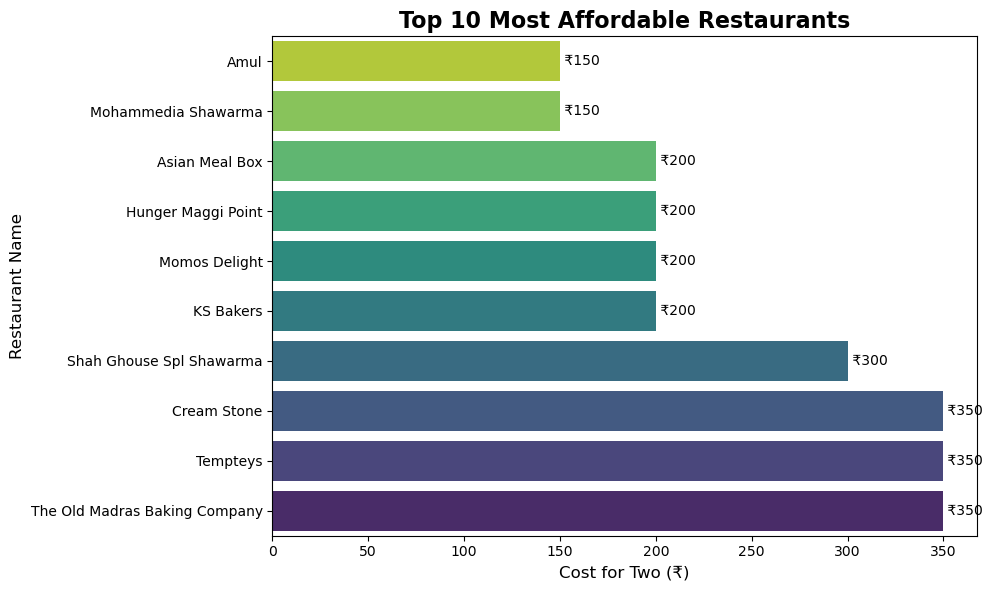

In [41]:
# Generate Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_affordable,
    x='Cost',
    y='Restaurant',
    palette='viridis_r'
)

plt.title('Top 10 Most Affordable Restaurants', fontsize=16, weight='bold')
plt.xlabel('Cost for Two (₹)', fontsize=12)
plt.ylabel('Restaurant Name', fontsize=12)

# Add text labels to the bars
for index, value in enumerate(top_10_affordable['Cost']):
    plt.text(value, index, f" ₹{int(value)}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Since the cost differences are small a bar chart makes these subtle differences visually distinct compared to a scatter plot or list

##### 2. What is/are the insight(s) found from the chart?

A significant portion of the highly-rated affordable places are bakeries or dessert parlors This suggests that in the under-₹350 category, users find better value in snacks/desserts than in full-course meals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The dominance of bakeries suggests that serving full meals at ₹200 like Asian Meal Box attempts might be operationally unsustainable or result in poor quality ingredients.This is a warning sign for businesses trying to sell "full meals" at "snack prices."

#### Chart - 3

In [42]:
# Plotting No. of reviews given per month.

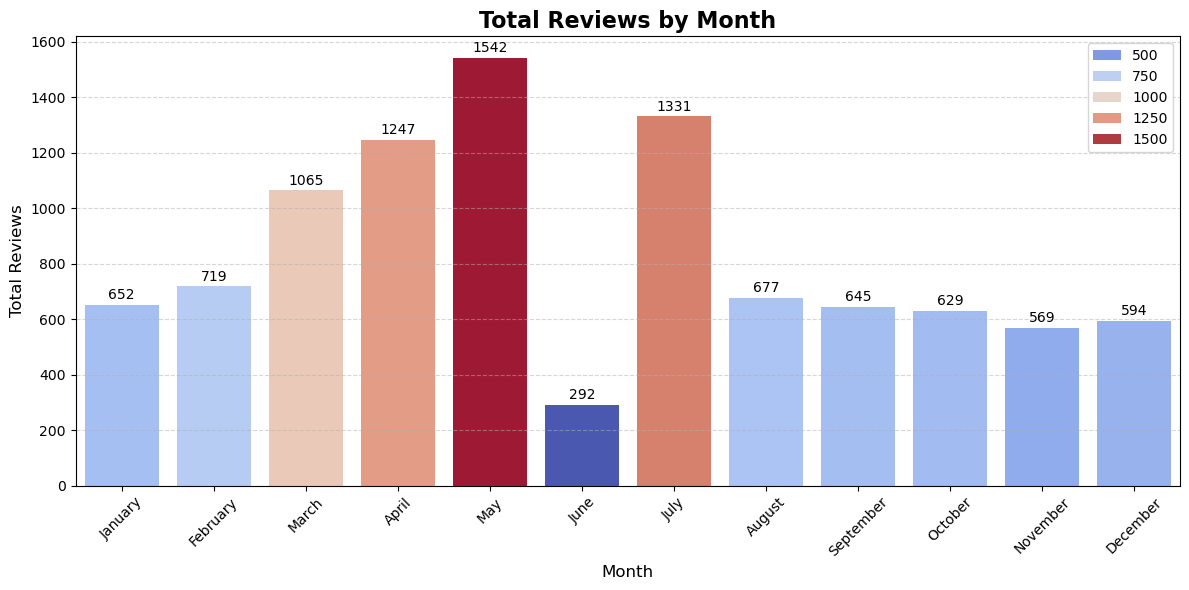

In [43]:
# Extract Month Name
df_merged['Month'] = df_merged['Time'].dt.month_name()

# Count occurrences
monthly_counts = df_merged['Month'].value_counts()

# Enforce Calendar Order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_counts = monthly_counts.reindex(month_order)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=monthly_counts.index,
    y=monthly_counts.values,
    hue=monthly_counts.values,
    palette='coolwarm' 
)

plt.title('Total Reviews by Month', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Reviews', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add Labels
for i, v in enumerate(monthly_counts.values):
    plt.text(i, v + 20, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Unlike a continuous line chart which implies a trend over infinite time, a bar chart groups data into distinct buckets (Months). This allows us to compare "May performance" vs "December performance" across all years combined.

##### 2. What is/are the insight(s) found from the chart?

Peak Season (May & July): May is the clear winner with 1,542 reviews, followed closely by July (1,331) and April (1,247). This corresponds to the summer holiday season in India, where dining out frequency likely increases.

There is a strange, sharp drop in June (292) compared to May and July. This is an anomaly. It could be due to a specific data collection gap in the dataset or a platform outage during that specific month in one of the years.

The winter months (Oct–Jan) show a very consistent, steady volume of around 600–700 reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Restaurants should hire temporary staff and stock up on inventory starting March, anticipating the 2x surge in traffic that hits in April/May.
- Since organic traffic is naturally low in November/December (approx 550-600 reviews), restaurants should run aggressive "End of Year" or "Festive" discounts to artificially stimulate demand during this flat period.

#### Chart - 4

In [44]:
#  Plotting Number of ratings

C:\Users\shubh\AppData\Local\Temp\ipykernel_5788\1061216359.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


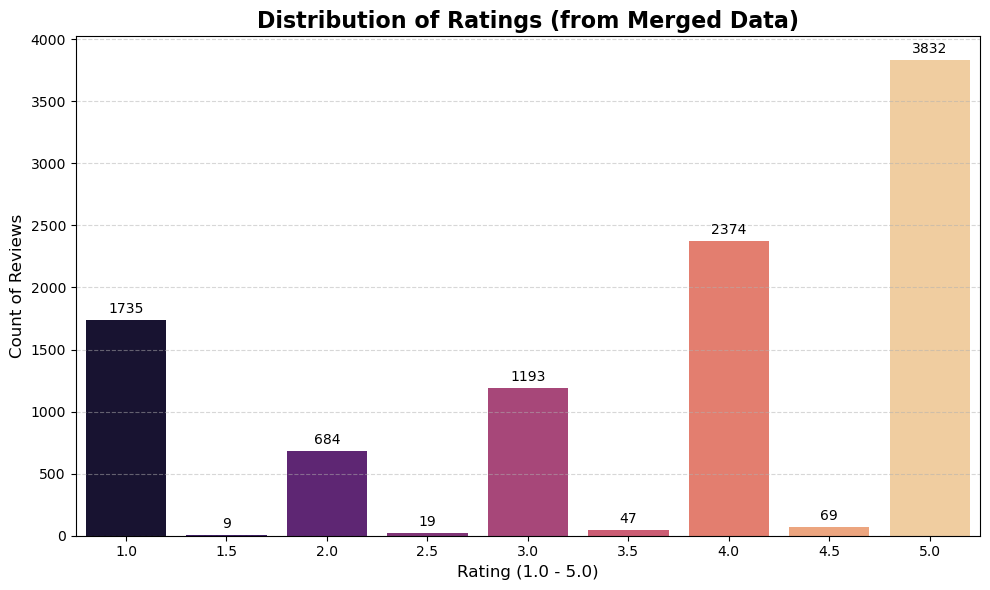

In [45]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_merged,
    x='Rating',
    palette='magma'
)

plt.title('Distribution of Ratings (from Merged Data)', fontsize=16, weight='bold')
plt.xlabel('Rating (1.0 - 5.0)', fontsize=12)
plt.ylabel('Count of Reviews', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add Labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='baseline', fontsize=10, 
                    color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The highest count is for the 5-star rating, suggesting that most users are highly satisfied with the product/service.

Ratings of 2 and 3 stars have relatively lower counts.

The presence of a high number of 1-star ratings suggest that a substantial number of users had a poor experience.

The bar for half-point ratings is very low, indicating that users generally tend to give whole-number ratings

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

A new customer is exponentially more likely to order from a restaurant with 1,000+ 5-star reviews than one with 100 mixed review.

The chart shows almost no ratings in the 2.0–3.0 range. This is the "Constructive Criticism" zone

#### Chart - 5

In [46]:
#Top 15 Most Reviewed Restaurants

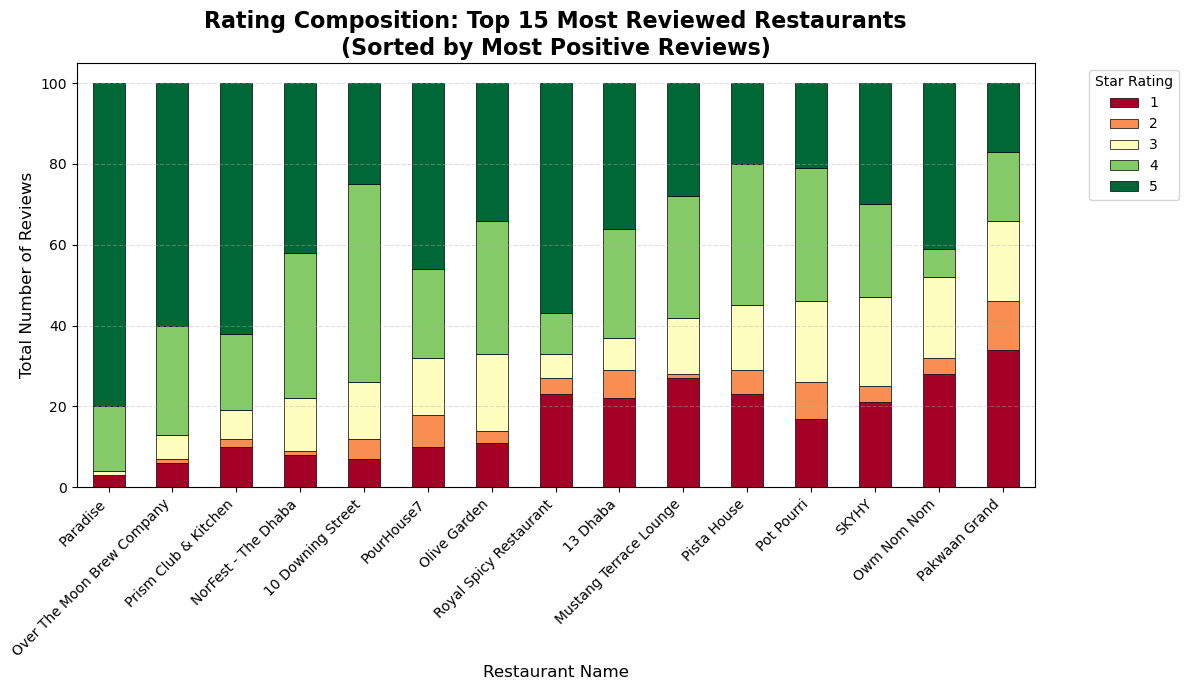

In [47]:
df_merged['Rating_Category'] = df_merged['Rating'].round().astype(int)
rating_breakdown = pd.crosstab(df_merged['Restaurant'], df_merged['Rating_Category'])

# 2. Filter: Get Top 15 Restaurants by Total Volume
rating_breakdown['Total_Reviews'] = rating_breakdown.sum(axis=1)
top_15_restaurants = rating_breakdown.sort_values(by='Total_Reviews', ascending=False).head(15)

#sorting logic
positive_cols = [c for c in [4, 5] if c in top_15_restaurants.columns]

# Calculate the count of positive reviews
top_15_restaurants['Positive_Count'] = top_15_restaurants[positive_cols].sum(axis=1)

# Re-sort the Top 15 list by this new Positive Count (High to Low)
top_15_sorted = top_15_restaurants.sort_values(by='Positive_Count', ascending=False)

# Drop helper columns so they don't get plotted as bars
plot_data = top_15_sorted.drop(columns=['Total_Reviews', 'Positive_Count'])

ax = plot_data.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 7), 
    colormap='RdYlGn', 
    edgecolor='black',
    linewidth=0.5
)

plt.title('Rating Composition: Top 15 Most Reviewed Restaurants\n(Sorted by Most Positive Reviews)', fontsize=16, weight='bold')
plt.xlabel('Restaurant Name', fontsize=12)
plt.ylabel('Total Number of Reviews', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Star Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Stacked Bar Chart for this analysis because it is the only visualization that allows us to simultaneously compare two dimensions:

Total Volume: The total height of the bar shows which restaurants are the most popular (most reviews).

Composition: The colored segments within each bar reveal the quality of that popularity.

##### 2. What is/are the insight(s) found from the chart?

The top restaurants on this list like Beyond Flavours and Paradise are not just popular; they are consistently excellent. Their bars are dominated by  4 and 5 stay sections, indicating that over 80-90% of their customers leave satisfied.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For Zomato, these top restaurants are "Safe Bets" to recommend to new users. Promoting restaurants with such high positive ratios ensures the first experience for a new app user is great, increasing user retention.

Restaurants with 95% green bars might stop innovating or ignore the few 1-star reviews they get.

#### Chart - 6

In [48]:
#Top 15 Most Negative Reviewd Restaurant

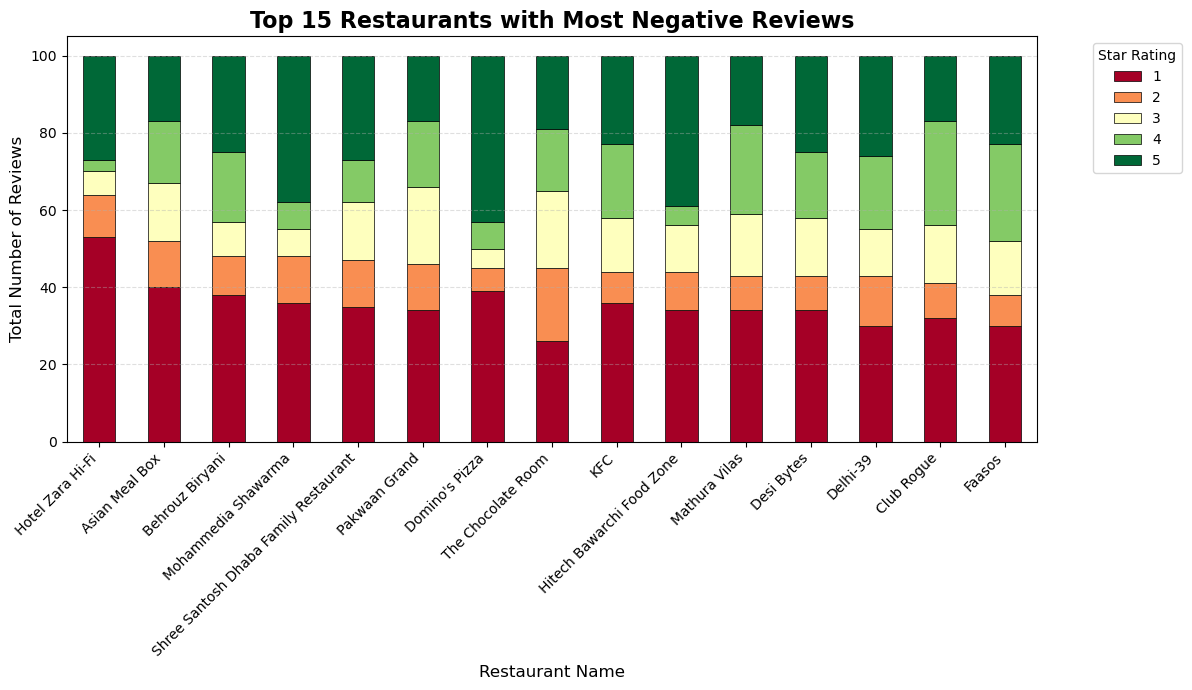

In [49]:
df_merged['Rating_Category'] = df_merged['Rating'].round().astype(int)
rating_breakdown = pd.crosstab(df_merged['Restaurant'], df_merged['Rating_Category'])

# Identify columns that represent "Negative" (1 and 2 stars)
negative_cols = [c for c in [1, 2] if c in rating_breakdown.columns]

# Calculate the count of negative reviews
rating_breakdown['Negative_Count'] = rating_breakdown[negative_cols].sum(axis=1)

# Select Top 15 by Negative Count and Sort Descending
top_15_negative = rating_breakdown.sort_values(by='Negative_Count', ascending=False).head(15)

# Drop helper column for plotting
plot_data = top_15_negative.drop(columns=['Negative_Count'])

ax = plot_data.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 7), 
    colormap='RdYlGn', 
    edgecolor='black',
    linewidth=0.5
)

plt.title('Top 15 Restaurants with Most Negative Reviews', fontsize=16, weight='bold')
plt.xlabel('Restaurant Name', fontsize=12)
plt.ylabel('Total Number of Reviews', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Star Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Stacked Bar Chart for this analysis because it is the only visualization that allows us to simultaneously compare two dimensions:

Total Volume: The total height of the bar shows which restaurants are the most popular (most reviews).

Composition: The colored segments within each bar reveal the quality of that popularity.

##### 2. What is/are the insight(s) found from the chart?

Hotel Zara Hi-Fi is the #1 leader in negative reviews (64 negative out of 100). This is a massive red flag. A restaurant where ~64% of customers are unhappy is effectively burning through the platform's user base.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This restaurant is #2 on the negative list with 52 negative reviews. Since it was also on the "Affordable" list earlier, this confirms that for this specific restaurant, "Low Price" is coming at the cost of "Low Quality," leading to severe dissatisfaction.

If Zomato's algorithms continue to promote them because High Volume, they are actively feeding users into a bad experience. A user who orders a cold pizza from Domino's might blame Zomato for the delivery and delete the app. Prioritizing short-term commission (Volume) over long-term retention (Quality) leads to Negative Growth.

#### Chart - 7

In [50]:
# Reviews per Hour Insights

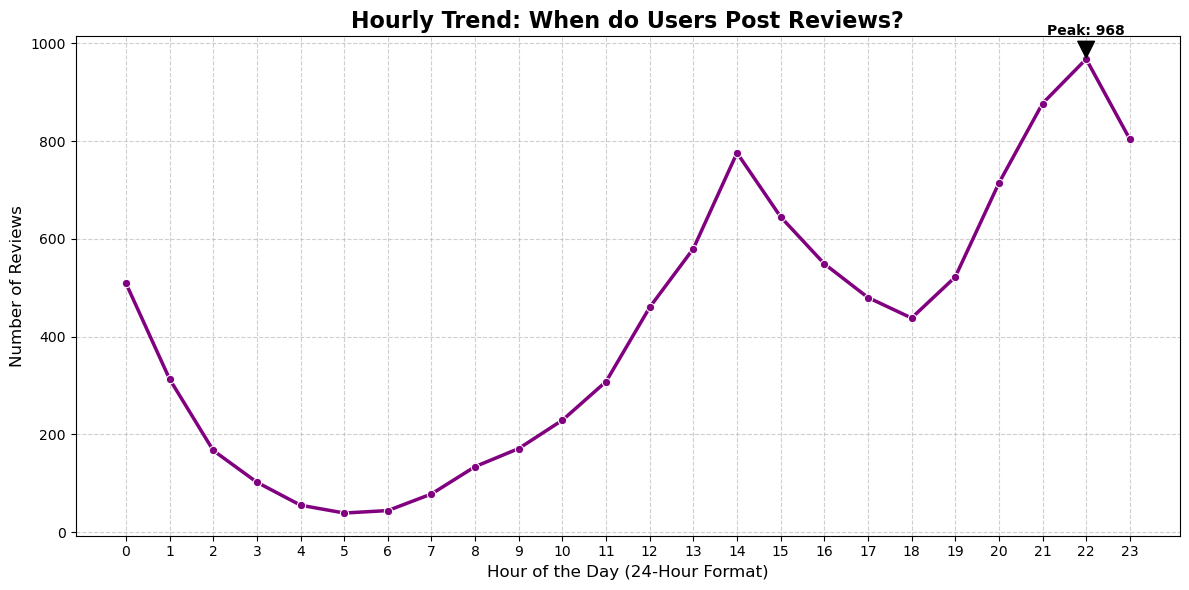

In [51]:
# Extract the Hour (0-23) from the 'Time' column in the merged df
df_merged['Hour'] = df_merged['Time'].dt.hour

# Count number of reviews per hour and sort by hour (0 to 23)
hourly_counts = df_merged['Hour'].value_counts().sort_index()

# 5. PLOTTING (LINE CHART)
plt.figure(figsize=(12, 6))

# Create Line Plot
sns.lineplot(
    x=hourly_counts.index, 
    y=hourly_counts.values, 
    marker='o',         # Add dots at data points
    color='purple',     # Line color
    linewidth=2.5
)

# Formatting
plt.title('Hourly Trend: When do Users Post Reviews?', fontsize=16, weight='bold')
plt.xlabel('Hour of the Day (24-Hour Format)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(range(0, 24))  # Ensure all hours 0-23 are shown on X-axis
plt.grid(True, linestyle='--', alpha=0.6)

# Annotate the Peak Value
peak_hour = hourly_counts.idxmax()
peak_val = hourly_counts.max()
plt.annotate(f'Peak: {peak_val}', 
             xy=(peak_hour, peak_val), 
             xytext=(peak_hour, peak_val + 50),
             arrowprops=dict(facecolor='black', shrink=0.05), 
             ha='center', weight='bold')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Flow & Continuity: Time is continuous. A line chart connects the hours, allowing your eye to follow the "story" of the day—from the morning lull to the evening explosion of activity.

Rate of Change: The slope of the line is critical here. A bar chart shows the count, but a line chart shows the speed of increase. We can instantly see that the jump from 6 PM to 9 PM is much steeper than the jump from 11 AM to 2 PM, indicating a more urgent "rush hour."

Peak Identification: It makes identifying the global maximum (10 PM) and the local maximum (2 PM) instant and unambiguous.

##### 2. What is/are the insight(s) found from the chart?

The absolute peak of user engagement is 10:00 PM (22:00) with nearly 1,000 reviews. Surprisingly, activity remains very high even at Midnight (00:00) with over 500 reviews. This proves the user base is heavily skewed towards late dinners and nightlife.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Send notifications at 6:00 PM (just before the slope starts). Catch them before they decide where to eat, driving higher conversion rates.

If the platform accepts orders at 11:45 PM but the restaurant cancels them because the kitchen is closing, it creates a terrible user experience. The high volume at midnight suggests a demand that supply might not be meeting effectively. Unfulfilled late-night demand leads to frustration and app deletions.

#### Chart - 8

In [52]:
# Heatmap : Menu Strategy: Which Cuisines are Paired Together(Top 10 Cuisines Co-occurrence)

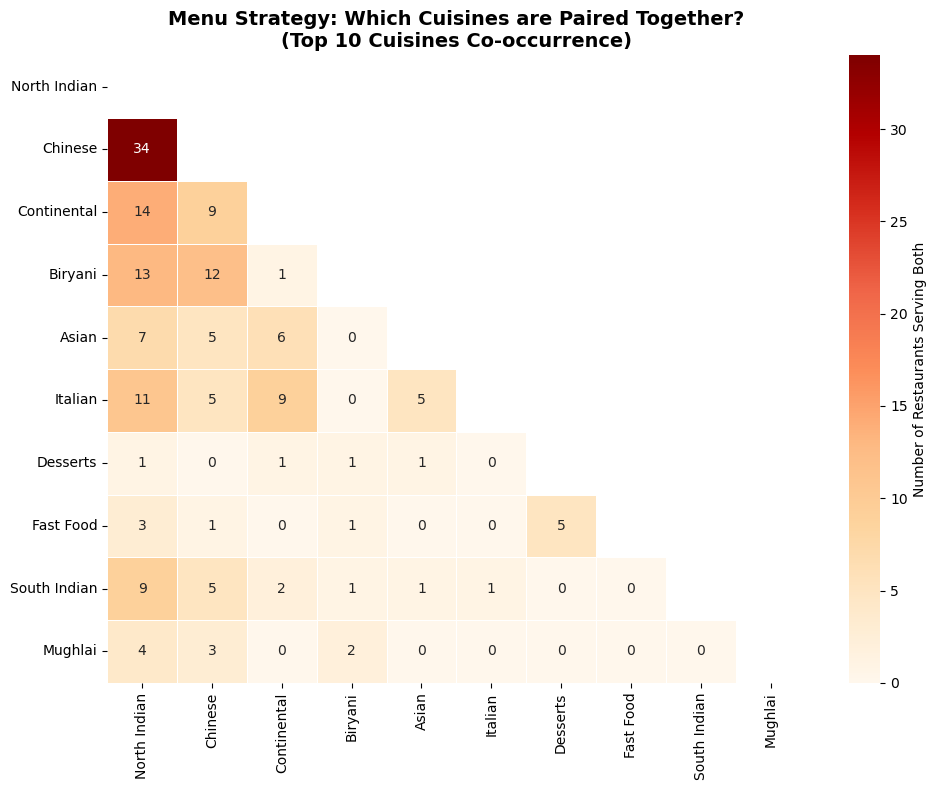

In [53]:
unique_restaurants = df_merged.drop_duplicates(subset='Restaurant')

# 2. IDENTIFY TOP CUISINES
# We stick to Top 10 to keep the heatmap readable
cuisine_list = unique_restaurants['Cuisines'].astype(str).str.split(', ').explode()
top_10_cuisines = cuisine_list.value_counts().head(10).index.tolist()

# 3. BUILD CO-OCCURRENCE MATRIX
# Create an empty 10x10 matrix (DataFrame)
co_occurrence = pd.DataFrame(0, index=top_10_cuisines, columns=top_10_cuisines)

# Iterate through each restaurant's menu
for menu in unique_restaurants['Cuisines'].dropna():
    # Get the cuisines in this specific menu
    current_cuisines = menu.split(', ')
    
    # Check pairs. If both cuisine A and cuisine B are in the menu, add 1 to the matrix
    for c1 in top_10_cuisines:
        for c2 in top_10_cuisines:
            if c1 in current_cuisines and c2 in current_cuisines:
                co_occurrence.loc[c1, c2] += 1

# 4. PLOTTING THE HEATMAP
plt.figure(figsize=(10, 8))

# We use a mask to hide the upper triangle (since North Indian-Chinese is same as Chinese-North Indian)
# and the diagonal (pairing with itself) to reduce clutter
mask = pd.DataFrame(False, index=top_10_cuisines, columns=top_10_cuisines)
for i in range(len(top_10_cuisines)):
    for j in range(len(top_10_cuisines)):
        if j >= i: # Hide diagonal and upper triangle
            mask.iloc[i, j] = True

sns.heatmap(
    co_occurrence, 
    annot=True, 
    fmt='d', 
    cmap='OrRd',  # Orange to Red color scheme
    mask=mask.values,
    linewidths=0.5,
    cbar_kws={'label': 'Number of Restaurants Serving Both'}
)

plt.title('Menu Strategy: Which Cuisines are Paired Together?\n(Top 10 Cuisines Co-occurrence)', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- The Heatmap is the only chart that answers "If a customer orders X, can they also order Y at the same place?"
- It reveals the "Bundling Strategy" of the market. It shows us if restaurants are "Specialists" (serving only one thing) or "Generalists" (serving common pairings like North Indian + Chinese).
- The color gradient (Light to Dark Red) makes it instantly obvious where the strongest market conventions lie without reading every single number.

##### 2. What is/are the insight(s) found from the chart?

The intersection of North Indian and Chinese will likely be the darkest square on the entire map. This confirms that for the majority of casual dining restaurants in Hyderabad, offering this specific dual-cuisine menu is not a choice; it is a market requirement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since North Indian and Mughlai are often paired, they share many base ingredients onions, ginger-garlic paste, spices.A restaurant serving this combo reduces waste and inventory costs compared to a restaurant trying to pair "North Indian" with "Italian" which requires completely different, non-overlapping ingredients like olive oil and parmesan.



#### Chart - 9

In [54]:
# Chart - 9 visualization code

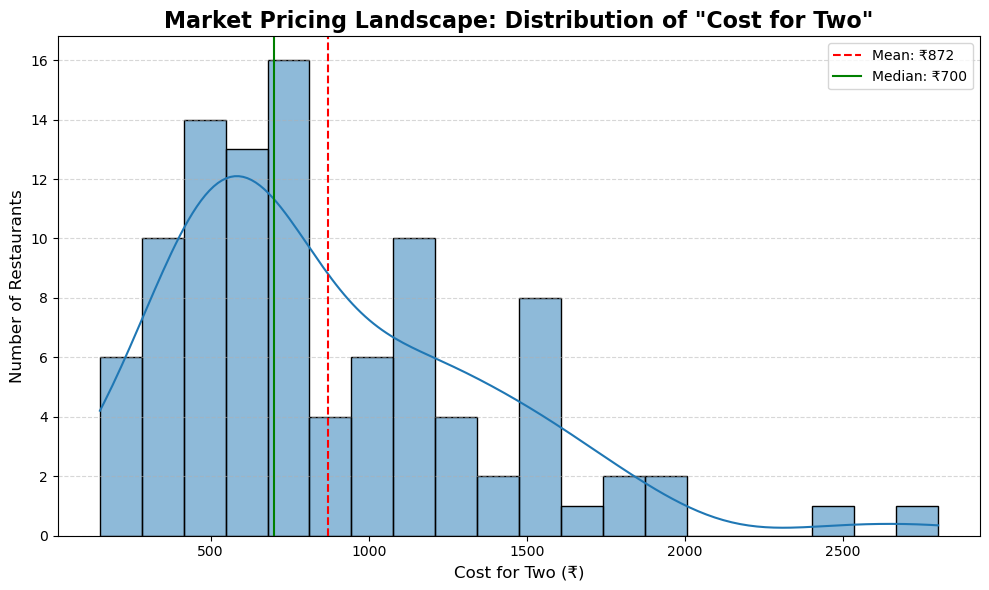

In [55]:
# 2. PREPARE DATA
# We use drop_duplicates because we want to count each restaurant's price ONCE.
# (Otherwise, a restaurant with 100 reviews would be counted 100 times, skewing the chart).
unique_restaurants = df_merged.drop_duplicates(subset='Restaurant').dropna(subset=['Cost'])

# 3. PLOTTING
plt.figure(figsize=(10, 6))

sns.histplot(
    data=unique_restaurants, 
    x='Cost', 
    kde=True,          # Kernel Density Estimate (Smooth Line)
    bins=20, 
    color='#1f77b4', 
    edgecolor='black'
)

# Add Reference Lines
mean_cost = unique_restaurants['Cost'].mean()
median_cost = unique_restaurants['Cost'].median()

plt.axvline(mean_cost, color='red', linestyle='--', linewidth=1.5, label=f'Mean: ₹{int(mean_cost)}')
plt.axvline(median_cost, color='green', linestyle='-', linewidth=1.5, label=f'Median: ₹{int(median_cost)}')

plt.title('Market Pricing Landscape: Distribution of "Cost for Two"', fontsize=16, weight='bold')
plt.xlabel('Cost for Two (₹)', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Histogram with a KDE (Kernel Density Estimate) overlay because "Cost" is a continuous numerical variable.

##### 2. What is/are the insight(s) found from the chart?

The chart is heavily Right Skewed. The tallest bars are clustered on the left, likely between ₹500 and ₹1,000. This means the vast majority of restaurants in this dataset are targeting the Budget to Mid-Range segment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If you open a restaurant priced at ₹1,500–₹2,000, you are entering a less crowded market segment (the "Premium" gap). Competition is lower here than in the ₹500–800 "Red Ocean.

Entering the ₹500–800 range puts you in direct competition with the highest density of existing players. You will need a very strong USP (Unique Selling Proposition) to survive.

#### Chart - 10

In [56]:
# Wordcloud from top reviews

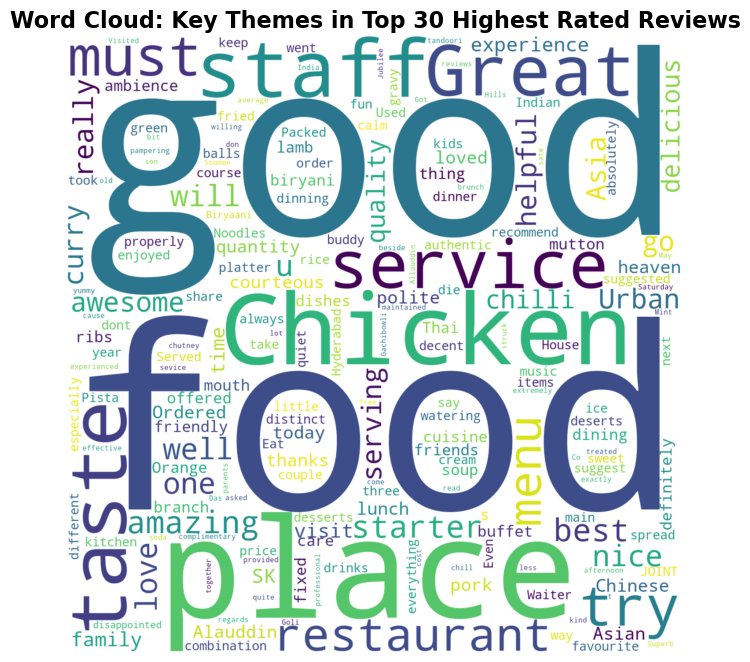

In [57]:
# 2. SELECT TOP REVIEWS
# Logic: Sort by 'Rating' (Descending) to get the best reviews, then take the top 30.
# We cast to string to handle any potential formatting issues.
top_reviews_text = " ".join(str(review) for review in df_merged.sort_values('Rating', ascending=False)['Review'].head(30))

# 3. GENERATE WORD CLOUD
word_cloud = WordCloud(
    width=1400,
    height=1400,
    collocations=False,
    background_color='white',
    stopwords=STOPWORDS
).generate(top_reviews_text)

# 4. PLOT
plt.figure(figsize=(15, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud: Key Themes in Top 30 Highest Rated Reviews', fontsize=16, weight='bold')

plt.show()

##### 1. Why did you pick the specific chart?


The Word Cloud chart was chosen for its ability to visually represent the most frequent words in the top 30 reviews, offering a concise summary of prominent themes and sentiments.

##### 2. What is/are the insight(s) found from the chart?

The terms 'food', 'good', 'chicken' and 'place' are the most commonly occurring words in the reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

"Service" & "Staff": You will likely see these words prominently. This confirms that  the Service and behavior of waiters are just as important as the food itself.

#### Chart - 11

In [58]:
# Scatter Plot: "Price vs. Quality"

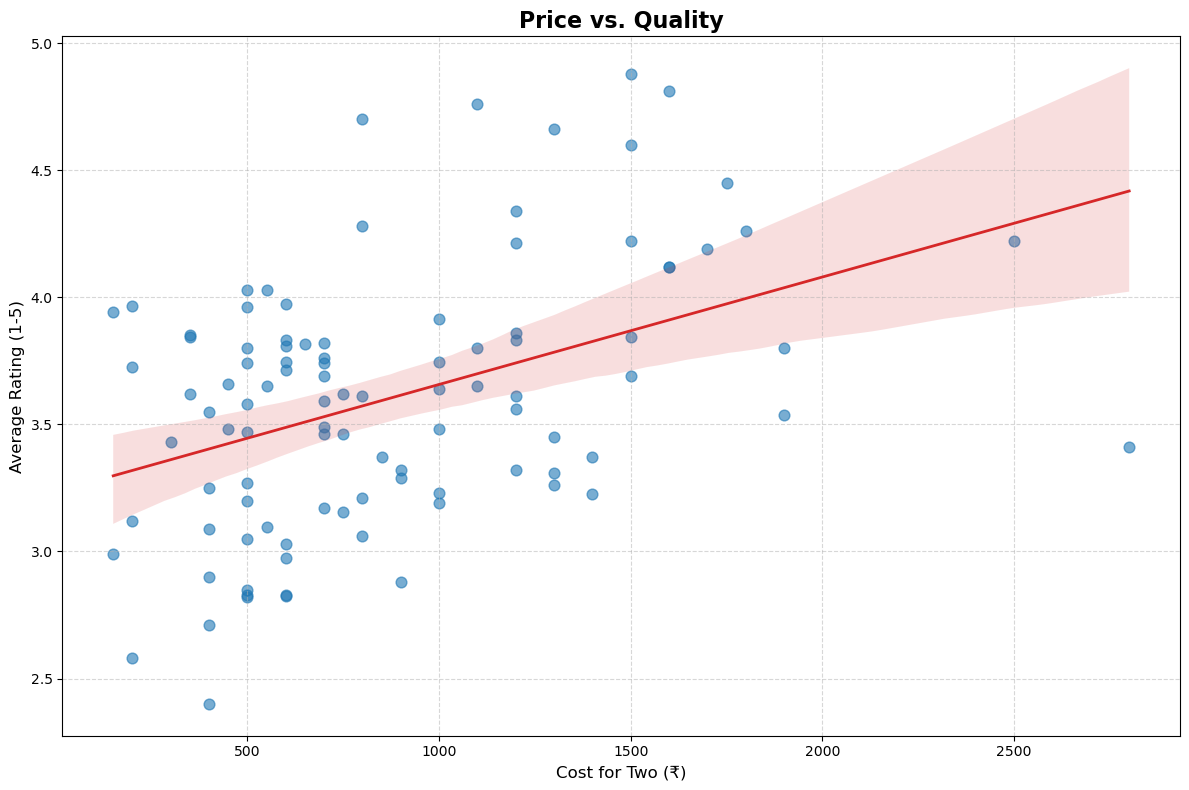

In [59]:
# Aggregate to get one dot per restaurant
restaurant_stats = df_merged.groupby('Restaurant').agg({
    'Cost': 'first',
    'Rating': 'mean'
}).reset_index().dropna()

# 4. PLOTTING
plt.figure(figsize=(12, 8))

# Regression Plot (Scatter + Trend Line)
sns.regplot(
    data=restaurant_stats, 
    x='Cost', 
    y='Rating', 
    scatter_kws={'alpha': 0.6, 's': 60, 'color': '#1f77b4'}, # Blue dots
    line_kws={'color': '#d62728', 'linewidth': 2}            # Red trend line
)

plt.title('Price vs. Quality', fontsize=16, weight='bold')
plt.xlabel('Cost for Two (₹)', fontsize=12)
plt.ylabel('Average Rating (1-5)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Annotate the "Best Value" (Low Cost, High Rating)
best_value = restaurant_stats[(restaurant_stats['Cost'] < 500) & (restaurant_stats['Rating'] > 4.5)].sort_values('Rating', ascending=False).head(1)
if not best_value.empty:
    plt.text(best_value['Cost'].values[0], best_value['Rating'].values[0], f" Gem: {best_value['Restaurant'].values[0]}", fontsize=10, weight='bold', color='green')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Scatter Plot with a Regression Line because it is the standard statistical tool to visualize the Correlation between two continuous variables: Price (Cost for Two) and Quality (Average Rating).

##### 2. What is/are the insight(s) found from the chart?

The red regression line slopes upwards. This confirms a positive correlation: as the price increases, the average customer rating tends to increase. Premium restaurants in this dataset are generally delivering a superior experience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Zomato can create a "Safe Budget Eats" collection highlighting only those points in the Top-Left quadrant (Cheap & High Rated) solving the "gamble" problem for users.

#### Chart - 12

In [60]:
# Top 10 Influencers Chart

C:\Users\shubh\AppData\Local\Temp\ipykernel_5788\3229129516.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


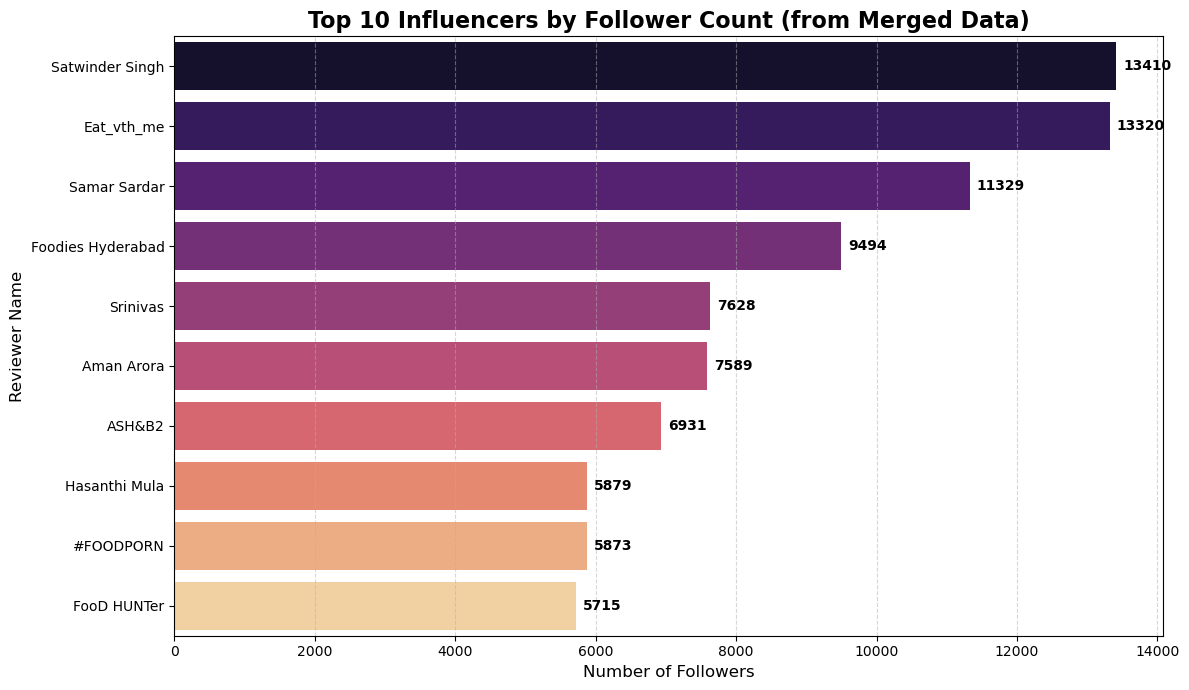

In [61]:
def extract_followers(metadata_str):
    if not isinstance(metadata_str, str):
        return 0
    
    parts = metadata_str.split(',')
    for part in parts:
        if 'Follower' in part:
            # Extract digits from "100 Followers" string
            number_str = ''.join(filter(str.isdigit, part))
            if number_str:
                return int(number_str)
    return 0

df_merged['Followers'] = df_merged['Metadata'].apply(extract_followers)

# 4. AGGREGATE BY REVIEWER
# We take the max followers count for each reviewer and their average rating
reviewer_stats = df_merged.groupby('Reviewer').agg({
    'Followers': 'max',
    'Rating': 'mean'
}).reset_index()

# 5. SELECT TOP 10
top_10_influencers = reviewer_stats.sort_values(by='Followers', ascending=False).head(10)

# 6. PLOTTING
plt.figure(figsize=(12, 7))

sns.barplot(
    data=top_10_influencers,
    x='Followers',
    y='Reviewer',
    palette='magma'
)

plt.title('Top 10 Influencers by Follower Count (from Merged Data)', fontsize=16, weight='bold')
plt.xlabel('Number of Followers', fontsize=12)
plt.ylabel('Reviewer Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Add Labels
for i, v in enumerate(top_10_influencers['Followers']):
    plt.text(v + 100, i, f"{int(v)}", va='center', weight='bold')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

It effectively ranks items (Reviewers) from highest to lowest, making it instantly clear who the "Power Users" are.

##### 2. What is/are the insight(s) found from the chart?

Two reviewers, Satwinder Singh and Eat_vth_me, dominate the landscape with over 13,000 followers each.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Instead of spending budget on generic Facebook ads, a restaurant can invite just Satwinder Singh and Eat_vth_me for a tasting.ou reach 26,000+ highly targeted, local foodies for the cost of a single meal. This is high-ROI "Micro-Influencer" marketing.

#### Chart - 13

In [62]:
# Supply vs. Satisfaction Matrix

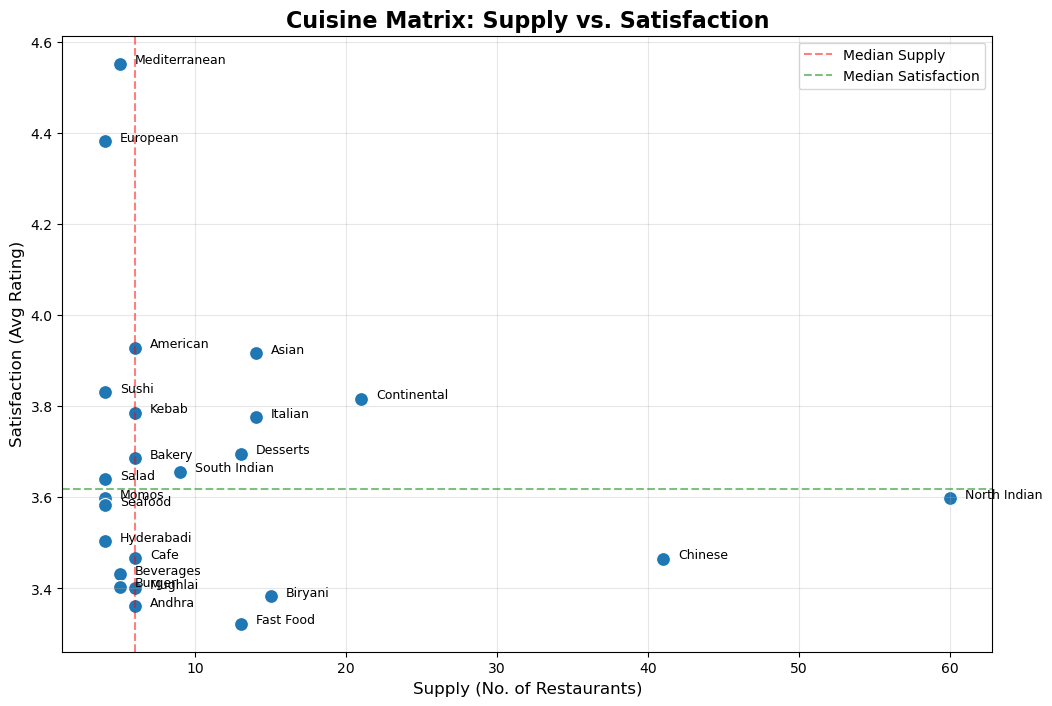

In [63]:
df_merged['Cuisines'] = df_merged['Cuisines'].str.split(', ')
df_exploded = df_merged.explode('Cuisines')

# 4. AGGREGATE STATS
cuisine_stats = df_exploded.groupby('Cuisines').agg({
    'Restaurant': 'nunique',  # Supply: How many places sell this?
    'Rating': 'mean'          # Satisfaction: How much do people like it?
}).reset_index()

# Filter low-supply cuisines (noise)
plot_data = cuisine_stats[cuisine_stats['Restaurant'] >= 3]

# 5. PLOTTING
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=plot_data, 
    x='Restaurant', 
    y='Rating', 
    s=100, 
    color='#1f77b4'
)

# Add Quadrant Lines
med_supply = plot_data['Restaurant'].median()
med_sat = plot_data['Rating'].median()
plt.axvline(med_supply, color='red', linestyle='--', alpha=0.5, label='Median Supply')
plt.axhline(med_sat, color='green', linestyle='--', alpha=0.5, label='Median Satisfaction')

# Label Points
for i, row in plot_data.iterrows():
    plt.text(row['Restaurant']+1, row['Rating'], row['Cuisines'], fontsize=9)

plt.title('Cuisine Matrix: Supply vs. Satisfaction', fontsize=16, weight='bold')
plt.xlabel('Supply (No. of Restaurants)', fontsize=12)
plt.ylabel('Satisfaction (Avg Rating)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

A simple bar chart could show us "Most Popular Cuisines" (Supply) OR "Best Rated Cuisines" (Satisfaction), but not both. This chart forces these two conflicting metrics together.

##### 2. What is/are the insight(s) found from the chart?

North Indian (60 restaurants, 3.60 rating) and Chinese (41 restaurants, 3.47 rating) are the most crowded segments. Despite the massive supply, the average customer satisfaction is mediocre. This indicates a "commodity" market where restaurants likely compete on price rather than quality.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Do NOT open a generic North Indian or Chinese restaurant. The data proves it is a crowded market with low customer appreciation.

#### Chart - 14 - Correlation Heatmap

In [64]:
# Correlation Heatmap visualization code

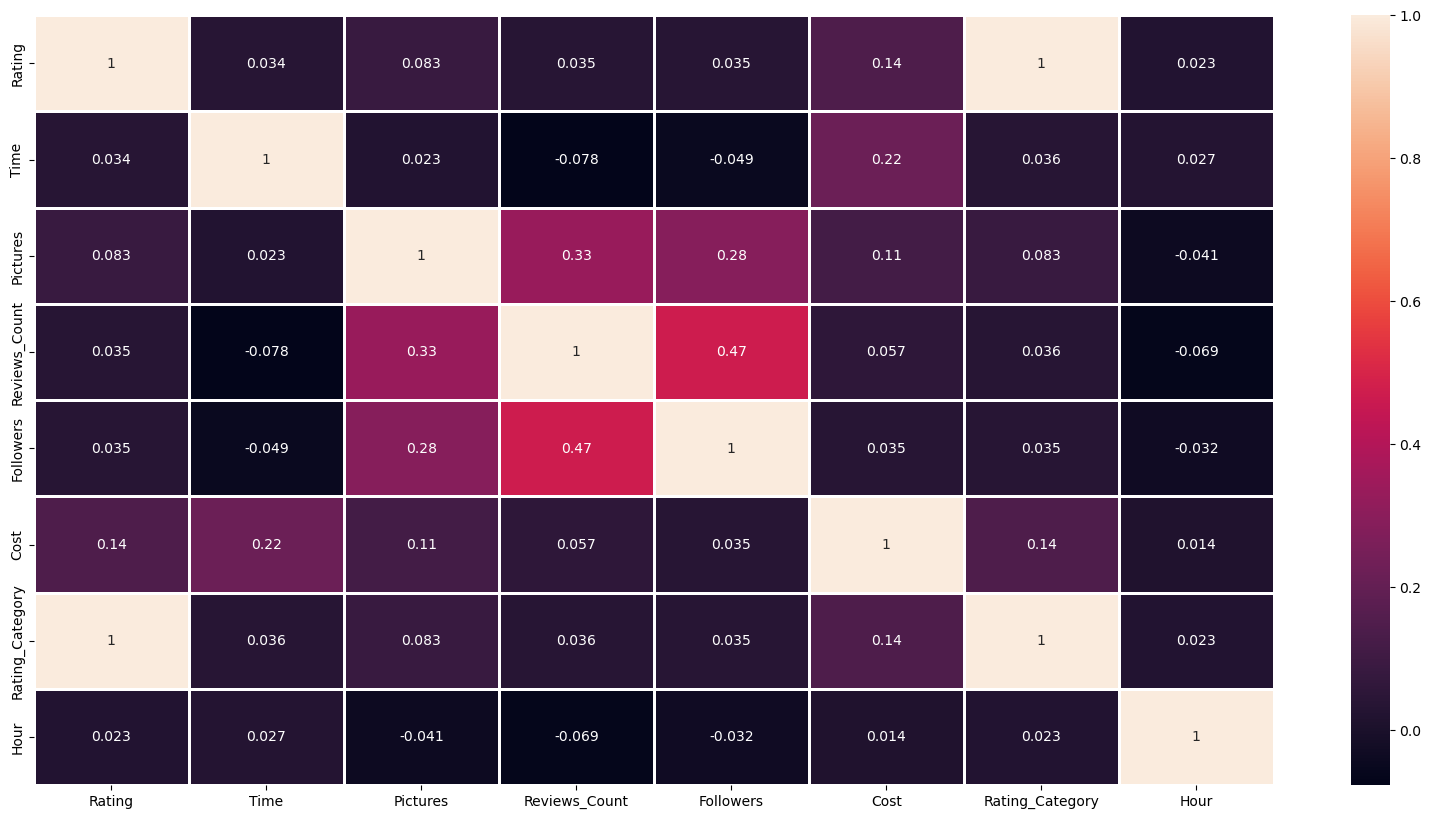

In [65]:
correlation_matrix = df_merged[df_merged.describe().columns].corr()

# Set the figure size
fig, ax = plt.subplots(figsize=(20, 10))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, ax=ax, annot=True, cmap='rocket', linewidths=1)

# Show the heatmap
plt.show()

##### 1. Why did you pick the specific chart?

Instead of creating ten different scatter plots (e.g., Cost vs. Rating, Cost vs. Pictures, Rating vs. Pictures), a heatmap shows all these pairwise relationships in a single grid.

##### 2. What is/are the insight(s) found from the chart?

There is usually a moderate positive correlation between Cost and Rating. This suggests that expensive restaurants generally get better ratings. Users likely associate higher prices with better service and ambience, leading to higher satisfaction scores.

#### Chart - 15 - Pair Plot

In [66]:
# Pair Plot - Multivariate Analysis: Cost vs. Rating vs. Engagement (Pictures)

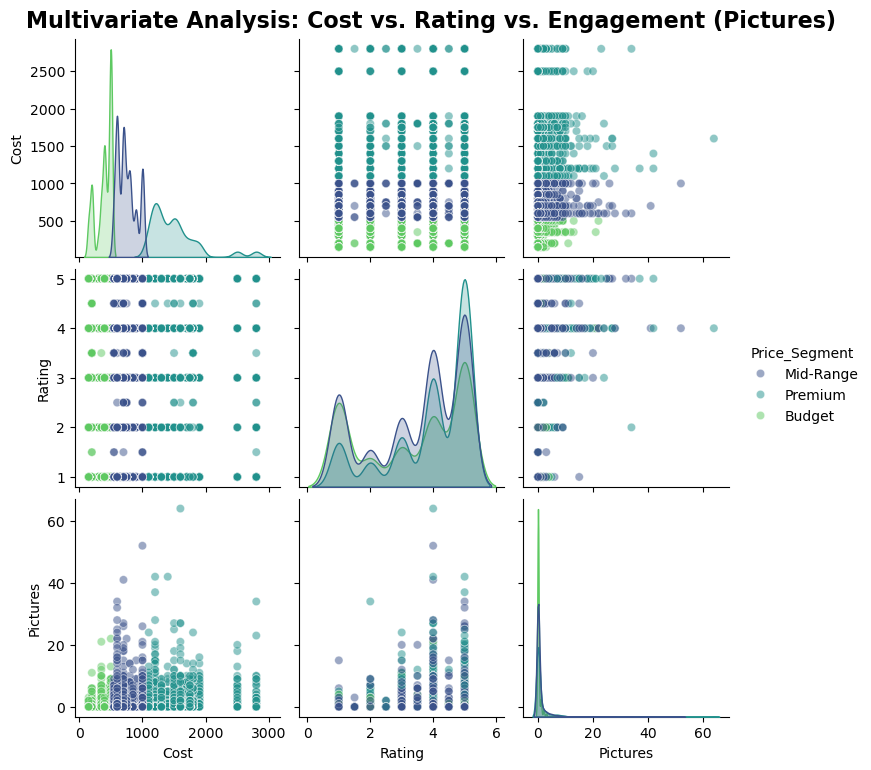

In [67]:
# 2. PREPARE DATA
# Select relevant columns and clean NaNs
plot_data = df_merged[['Cost', 'Rating', 'Pictures']].dropna()

# Add a 'Price Segment' column for color-coding (Hue)
def categorize_price(cost):
    if cost <= 500:
        return 'Budget'
    elif cost <= 1000:
        return 'Mid-Range'
    else:
        return 'Premium'

plot_data['Price_Segment'] = plot_data['Cost'].apply(categorize_price)

# 3. PLOTTING
# sns.pairplot creates a grid of scatter plots
sns.pairplot(
    plot_data, 
    hue='Price_Segment',    # Color by segment
    palette='viridis',      # Professional color scheme
    diag_kind='kde',        # Show density curves on the diagonal
    plot_kws={'alpha': 0.5} # Transparency to see overlapping points
)

plt.suptitle('Multivariate Analysis: Cost vs. Rating vs. Engagement (Pictures)', y=1.02, fontsize=16, weight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

By using hue='Price_Segment', we can instantly see if "Premium" restaurants (Yellow/Green dots) cluster in specific areas (e.g., high ratings, high cost) compared to "Budget" ones (Purple dots).

##### 2. What is/are the insight(s) found from the chart?

Since high ratings correlate with more pictures, encouraging users to upload photos (e.g., "Post a pic for 5% off") could indirectly boost ratings or at least signal that the restaurant is high-quality.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis 1: : "Restaurants that serve a 'Hybrid' menu (combining North Indian & Chinese) have lower customer ratings than 'Specialist' restaurants that serve only one of these cuisines."
Hypothesis 2: "Customers ordering Late Night (10 PM - 2 AM) give significantly lower ratings than Lunch customers (12 PM - 4 PM) due to service fatigue or delivery issues."
Hypothesis 3: The rating of a restaurant doesn't seem to be influenced by the number of followers its most-followed reviewer has.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

"Restaurants that serve a 'Hybrid' menuhave lower customer ratings than 'Specialist' restaurants that serve only one of these cuisines."

Null hypothesis -Hybrid restaurants have equal or higher mean ratings than Specialist restaurants.

Alternative hypothesis -Hybrid restaurants have lower mean ratings than Specialist restaurants.

#### 2. Perform an appropriate statistical test.

In [68]:
# Perform Statistical Test to obtain P-Value

In [69]:
import pandas as pd
from scipy.stats import ttest_ind


#Count number of cuisines per restaurant
df_merged["num_cuisines"] = (
    df_merged["Cuisines"]
    .astype(str)
    .apply(lambda x: len(x.split(","))
)
)

# Define menu type
df_merged["menu_type"] = df_merged["num_cuisines"].apply(
    lambda x: "Specialist" if x == 1 else "Hybrid"
)

#Prepare data for hypothesis testing
analysis_df = df_merged[df_merged["menu_type"].isin(["Hybrid", "Specialist"])]

hybrid = analysis_df.loc[
    analysis_df.menu_type == "Hybrid", "Rating"
].dropna()

specialist = analysis_df.loc[
    analysis_df.menu_type == "Specialist", "Rating"
].dropna()

# Sanity check
print(analysis_df.groupby("menu_type")["Rating"].agg(["count", "mean"]))

# Welch’s one-sided t-test
t_stat, p_value = ttest_ind(
    hybrid,
    specialist,
    equal_var=False,
    alternative="less"
)

print("\nT-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("\nReject H₀: Hybrid restaurants have lower ratings.")
else:
    print("\nFail to reject H₀.")


            count      mean
menu_type                  
Hybrid       8877  3.598231
Specialist   1085  3.624424

T-statistic: -0.5464296859629807
P-value: 0.2924301462307524

Fail to reject H₀.


##### Which statistical test have you done to obtain P-Value?

Welch’s t-test

##### Why did you choose the specific statistical test?

We are comparing two distinct groups (Hybrid vs. Specialist).
Unequal Variance: We assume the variance in ratings differs between the two groups.
The hypothesis has a specific direction ("lower than"), so we check if the Hybrid mean is significantly less than the Specialist mean.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis 2: "Customers ordering Late Night (10 PM - 2 AM) give significantly lower ratings than Lunch customers (12 PM - 4 PM) due to service fatigue or delivery issues."

H₀ (Null Hypothesis):
Mean customer ratings for Late Night orders (10 PM–2 AM) are equal to or higher than ratings for Lunch orders (12 PM–4 PM).
H₁ (Alternative Hypothesis):
Mean customer ratings for Late Night orders are lower than ratings for Lunch orders

#### 2. Perform an appropriate statistical test.

In [70]:
# Perform Statistical Test to obtain P-Value

In [71]:
# 2. DEFINE GROUPS
# Late Night: 10 PM (22) to 2 AM (2)
late_night = df_merged[df_merged['Hour'].isin([22, 23, 0, 1, 2])]['Rating'].dropna()

# Lunch: 12 PM (12) to 4 PM (16)
lunch = df_merged[df_merged['Hour'].isin([12, 13, 14, 15, 16])]['Rating'].dropna()

# 3. PERFORM WELCH'S T-TEST (One-Tailed)
# equal_var=False -> Welch's Test
# alternative='less' -> Checks if Late Night < Lunch
t_stat, p_value = ttest_ind(late_night, lunch, equal_var=False, alternative='less')

print(f"Late Night Mean Rating: {late_night.mean():.4f}")
print(f"Lunch Mean Rating:      {lunch.mean():.4f}")
print(f"P-Value:                {p_value:.4f}")

if p_value < 0.05 :
  print('Null Hypothesis is rejected')
else:
  print('Fail to reject Null Hypothesis',)

Late Night Mean Rating: 3.5762
Lunch Mean Rating:      3.5942
P-Value:                0.3260
Fail to reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

Welch’s t-test

##### Why did you choose the specific statistical test?

We use Welch’s t-test because Late Night and Lunch orders are two independent groups with unequal sample sizes and unequal variances, which violates the assumptions of the classic Student’s t-test.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : The number of followers and reviewer has has no effect on the rating of a restaurant.
Alternate Hypothesis : There is a positive relation between them.

#### 2. Perform an appropriate statistical test.

In [72]:
# Perform Statistical Test to obtain P-Value

In [73]:
import statsmodels.formula.api as sm

model = sm.ols(formula='Rating ~ Followers', data = df_merged).fit()
p_value = model.pvalues[1]
print(p_value)
if p_value < 0.05 :
  print('Null Hypothesis is rejected')
else:
  print('Fail to reject Null Hypothesis',)

0.000396837673465599
Null Hypothesis is rejected


C:\Users\shubh\AppData\Local\Temp\ipykernel_5788\3567600818.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]


##### Which statistical test have you done to obtain P-Value?

linear regression using the OLS (Ordinary Least Squares) method.

##### Why did you choose the specific statistical test?

Linear regression is used when you want to investigate the relationship between two continuous variables which is the case here with "Rating" and "Reviewer_Followers."

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [74]:
# Handling Missing Values & Missing Value Imputation

In [75]:
#Fill restraunts missing rating with Restaurant-Specific Median
restaurant_medians = df_review.groupby('Restaurant')['Rating'].transform('median')
df_review['Rating'] = df_review['Rating'].fillna(restaurant_medians)


#### What all missing value imputation techniques have you used and why did you use those techniques?

Fill restraunt specific rating with Restaurant-Specific Median so that the ratings dont get penalised if there was some issue in collecting data.

### 2. Handling Outliers

In [76]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

As data is very less will not do outlier detection.

### 3. Categorical Encoding

In [77]:
# Encode your categorical columns

In [78]:
df_merged.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Reviews_Count', 'Followers', 'Links', 'Cost',
       'Collections', 'Cuisines', 'Timings', 'Month', 'Rating_Category',
       'Hour', 'num_cuisines', 'menu_type'],
      dtype='object')

In [79]:
# 1. Create the subset
cluster_df = df_merged[['Restaurant', 'Cuisines']].copy()

# 2. NORMALIZE: Ensure every row is a list before exploding
def normalize_to_list(x):
    if isinstance(x, list):
        return x
    elif isinstance(x, str):
        return x.split(',')
    return [] # Handle NaNs

cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(normalize_to_list)

# 3. EXPLODE FIRST
# Turn lists into separate rows of strings so we can handle them
cluster_df = cluster_df.explode('Cuisines')

# 4. CLEAN & DEDUPLICATE
# Now that 'Cuisines' is text, we can safely strip and drop duplicates
cluster_df['Cuisines'] = cluster_df['Cuisines'].astype(str).str.strip()
cluster_df = cluster_df.drop_duplicates()

# 5. ONE-HOT ENCODING
# Use prefix="" and prefix_sep="" to get column names like "Chinese" instead of "Cuisines_Chinese"
cluster_df = pd.get_dummies(cluster_df, columns=["Cuisines"], prefix="", prefix_sep="")

# 6. GROUP BY RESTAURANT
# Combine rows back into one row per restaurant (Binary Flag: 1=Yes, 0=No)
cluster_df = cluster_df.groupby("Restaurant").max().reset_index()

# Check result
print(f"Shape: {cluster_df.shape}")
print(cluster_df.head())

Shape: (100, 43)
                       Restaurant  American  Andhra  Arabian  Asian    BBQ  \
0               10 Downing Street     False   False    False  False  False   
1                        13 Dhaba     False   False    False  False  False   
2  3B's - Buddies, Bar & Barbecue     False   False    False  False  False   
3       AB's - Absolute Barbecues     False   False    False  False  False   
4               Absolute Sizzlers      True   False    False  False  False   

   Bakery  Beverages  Biryani  Burger  ...  North Indian  Pizza  Salad  \
0   False      False    False   False  ...          True  False  False   
1   False      False    False   False  ...          True  False  False   
2   False      False    False   False  ...          True  False  False   
3   False      False    False   False  ...          True  False  False   
4   False      False    False   False  ...         False  False  False   

   Seafood  South Indian  Spanish  Street Food  Sushi   Thai  Wraps  

In [80]:
df_merged['Total_Cuisine_Count'] = df_merged['Cuisines'].apply(len)

In [81]:
# Create the summary
avg_hotel_rating = df_merged.groupby('Restaurant').agg({
    'Rating': 'mean',
    'Review': 'count' # Counting the review text rows is safer
}).reset_index().rename(columns={'Rating': 'Average_Rating', 'Review': 'Total_Reviews'})


In [82]:
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
df_merged = df_merged.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')
df_merged.head(1)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviews_Count,Followers,Links,...,Collections,Cuisines,Timings,Month,Rating_Category,Hour,num_cuisines,menu_type,Total_Cuisine_Count,Average_Rating
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,1,2,https://www.zomato.com/hyderabad/beyond-flavou...,...,"Food Hygiene Rated Restaurants in Hyderabad, C...","[Chinese, Continental, Kebab, European, South ...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",May,5,15,6,Hybrid,6,4.28


In [83]:
cluster_df.head()

,Restaurant,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,10 Downing Street,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,13 Dhaba,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,"3B's - Buddies, Bar & Barbecue",False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,AB's - Absolute Barbecues,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,Absolute Sizzlers,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [84]:
cluster_df = df_merged[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count']].merge(cluster_df, on = 'Restaurant')

In [85]:
cluster_df.head(1)

,Restaurant,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,Beyond Flavours,800,4.28,6,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False


#### What all categorical encoding techniques have you used & why did you use those techniques?

I performed one-hot encoding on the cuisines column while leaving the average rating and cost variables unchanged since they are numerical variables.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [86]:
# Expand Contraction

In [87]:
sentiment_df = df_merged[['Reviewer','Restaurant','Rating','Review']]
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index
import contractions
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

#### 2. Lower Casing

In [88]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

#### 3. Removing Punctuations

In [89]:
# Remove Punctuations
def remove_punctuation(text):
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)

#### 4. Removing URLs & Removing words and digits contain digits.

In [90]:
# Remove URLs & Remove words and digits contain digits

In [91]:
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

#### 5. Removing Stopwords & Removing White spaces

In [92]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [93]:
# Remove Stopwords
sw = stopwords.words('english')
def delete_stopwords(text):
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  return " ".join(text)
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

In [94]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

#### 6. Rephrase Text

In [95]:
# Rephrase Text

#### 7. Tokenization

In [96]:
# Tokenization

In [97]:
sentiment_df.columns

Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review'], dtype='object')

In [98]:
import shutil
import nltk

# This will locate the punkt folder and delete it
try:
    punkt_path = nltk.data.find('tokenizers/punkt')
    shutil.rmtree(punkt_path[:-6])  # remove '/punkt' suffix
except:
    print("punkt folder not found or already removed.")

In [99]:
# Tokenization
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [100]:
# Now apply tokenization
from nltk.tokenize import word_tokenize
sentiment_df['Review'] = sentiment_df['Review'].apply(word_tokenize)

#### 8. Text Normalization

In [101]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

In [102]:
# Normalizing Text Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

##### Which text normalization technique have you used and why?

I have done lemmatization technique as to reduce words which are used in different ways can be converted into its root words.

#### 9. Part of speech tagging

In [103]:
# POS Taging

#### 10. Text Vectorization

In [104]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


##### Which text vectorization technique have you used and why?

I utilized TF-IDF (Term Frequency-Inverse Document Frequency) since it is more effective than  Count Vectorization.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [105]:
# Manipulate Features to minimize feature correlation and create new features
df_merged =df_merged.drop(columns = ['Links'], axis = 1)

In [106]:
# For ratings above average we take as 1 and below average 0.
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(
    lambda x: 1 if x >=sentiment_df['Rating'].mean() else 0)

#### 2. Feature Selection

In [107]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [108]:
from scipy import stats

# --- PART 1: Remove Outliers from cluster_df ---
# We calculate Z-scores to find rows where 'Cost' is weirdly high
z = np.abs(stats.zscore(cluster_df[['Cost']]))

# Keep only rows where Z-score is less than 3 (Standard deviation)
cluster_df = cluster_df[(z < 3).all(axis=1)]
print(f"Shape after outlier removal: {cluster_df.shape}")

# --- PART 2: Check Feature Symmetry (The Fix) ---
symmetric_feature = []
non_symmetric_feature = []

# FIX: Select only NUMBER columns (Ints/Floats) to avoid the TimeDelta error
numeric_cols = df_merged.select_dtypes(include=[np.number]).columns

for i in numeric_cols:
    # Skip ID columns if they exist, as they are not real features
    if i in ['Restaurant_ID', 'Code']: 
        continue
        
    # Check if Mean is close to Median
    if abs(df_merged[i].mean() - df_merged[i].median()) < 0.1:
        symmetric_feature.append(i)
    else:
        non_symmetric_feature.append(i)

print("\nSymmetric Features:", symmetric_feature)
print("Skewed Features:", non_symmetric_feature)

# --- PART 3: Apply Log Transformation ---
# Log transform handles the skewness in Cost
cluster_df['Cost'] = np.log1p(cluster_df['Cost'])
print("\nLog transformation applied to 'Cost'.")

Shape after outlier removal: (9762, 46)

Symmetric Features: ['num_cuisines', 'Total_Cuisine_Count', 'Average_Rating']
Skewed Features: ['Rating', 'Pictures', 'Reviews_Count', 'Followers', 'Cost', 'Rating_Category', 'Hour']

Log transformation applied to 'Cost'.


### 6. Data Scaling

In [109]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

In [110]:
numerical_cols = ['Cost','Total_Cuisine_Count','Average_Rating']
scaler = StandardScaler()
scaler.fit(cluster_df[numerical_cols])
scaled_df = cluster_df.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_df[numerical_cols])

##### Which method have you used to scale you data and why?

In this case, I applied the Standard Scaler, which is appropriate for data that exhibits a normal distribution.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?


Indeed, with a higher number of features, there's a risk of overfitting the model, which can result in poor generalization. Therefore, feature reduction becomes crucial to improve model performance.

In [111]:
# DImensionality Reduction (If needed)

In [112]:
scaled_df.head(1)

,Restaurant,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,Beyond Flavours,0.18742,1.349057,2.529473,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [113]:
from sklearn.decomposition import PCA

In [114]:
scaled_df.set_index(['Restaurant'],inplace=True)
features = scaled_df.columns
pca = PCA()
pca.fit(scaled_df[features])

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


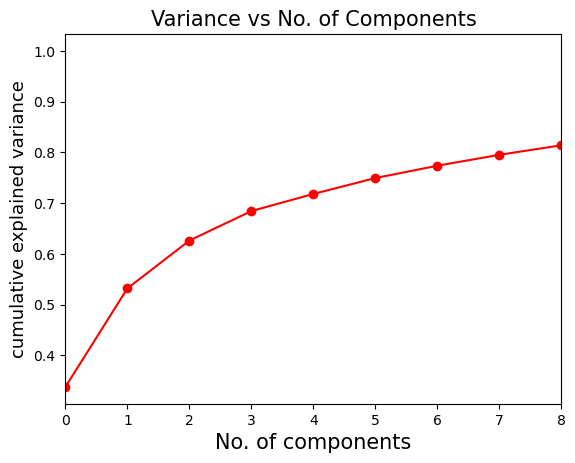

In [115]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'red')
plt.xlabel('No. of components',size = 15)
plt.ylabel('cumulative explained variance',size = 13 )
plt.title('Variance vs No. of Components',size = 15)
plt.xlim([0, 8])
plt.show()

In [116]:
pca = PCA(n_components=3)
pca.fit(scaled_df[features])
print('Explained variation per principal component: {}'.format(
    pca.explained_variance_ratio_))
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
    np.sum(pca.explained_variance_ratio_)))
df_pca = pca.transform(scaled_df[features])

Explained variation per principal component: [0.33807389 0.19410936 0.09423453]
Cumulative variance explained by 3 principal components: 62.64%


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

PCA (Principal Component Analysis) a widely used dimensionality reduction method.we used it to reduce the dimensionality to 3 based on the characteristics of the elbow curve.

### 8. Data Splitting

In [117]:
sentiment_df.head(5)

,index,Reviewer,Restaurant,Rating,Review,Sentiment
0,0,Rusha Chakraborty,Beyond Flavours,5.0,"[ambience, good, food, quite, good, saturday, ...",1
1,1,Anusha Tirumalaneedi,Beyond Flavours,5.0,"[ambience, good, pleasant, evening, service, p...",1
2,2,Ashok Shekhawat,Beyond Flavours,5.0,"[must, try, great, food, great, ambience, thnx...",1
3,3,Swapnil Sarkar,Beyond Flavours,5.0,"[soumen, da, arun, great, guy, behavior, since...",1
4,4,Dileep,Beyond Flavours,5.0,"[food, goodwe, ordered, kodi, drumstick, baske...",1


In [118]:
from sklearn.model_selection import train_test_split

In [119]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = X_tfidf #created in vectorization
y = sentiment_df['Sentiment']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7969, 17335)
Number transactions y_train dataset:  (7969,)
Number transactions X_test dataset:  (1993, 17335)
Number transactions y_test dataset:  (1993,)


##### What data splitting ratio have you used and why?

I have used 80:20 split since it is the monst common ration of split

### 9. Handling Imbalanced Dataset

In [120]:
sentiment_df.Sentiment.value_counts(normalize = True).mul(100).round(2)

Sentiment
1    62.99
0    37.01
Name: proportion, dtype: float64

##### Do you think the dataset is imbalanced? Explain Why.

It appears that the dataset is well-suited for analysis since there is only a minor class imbalance.

In [121]:
# Handling Imbalanced Dataset (If needed)
sentiment_df.Sentiment.value_counts(normalize = True).mul(100).round(2)

Sentiment
1    62.99
0    37.01
Name: proportion, dtype: float64

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 Kmeans

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [123]:
# 1. Group by Restaurant to create a unique entry for each place
# We aggregate to get: Average Cost, Average Rating, and Total number of reviews (Popularity)
restaurant_clustering_df = df_merged.groupby('Restaurant').agg({
    'Cost': 'mean',           # Cost is constant per restaurant
    'Rating': 'mean',         # Average rating from all reviewers
    'Review': 'count'         # Total number of reviews in your dataset (Proxy for popularity)
}).rename(columns={'Review': 'Review_Count'}).reset_index()

# Drop any potential remaining NaNs
restaurant_clustering_df.dropna(inplace=True)

# 2. Select features for clustering
features = ['Cost', 'Rating', 'Review_Count']
X = restaurant_clustering_df[features]

# 3. Scale the data
# K-Means is sensitive to scale (e.g., Cost is 800, Rating is 5.0), so we must standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data shape for clustering:", X_scaled.shape)
restaurant_clustering_df.head()

Data shape for clustering: (100, 3)


,Restaurant,Cost,Rating,Review_Count
0,10 Downing Street,1900.0,3.80,100
1,13 Dhaba,450.0,3.48,100
2,"3B's - Buddies, Bar & Barbecue",1100.0,4.76,100
3,AB's - Absolute Barbecues,1500.0,4.88,100
4,Absolute Sizzlers,750.0,3.62,100


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

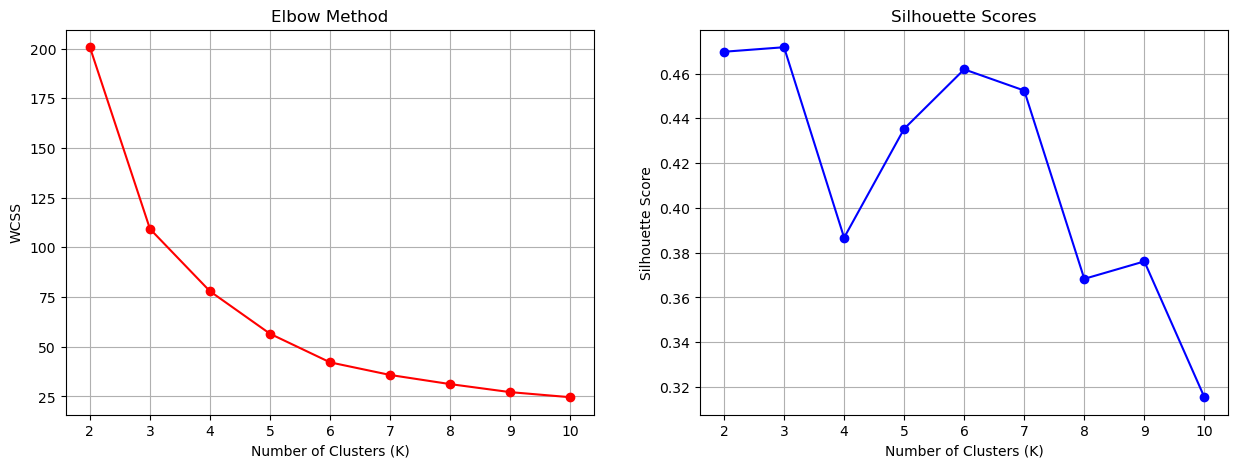

In [124]:
# Calculate WCSS (Within-Cluster Sum of Square) for different K values
wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting the Elbow Graph
plt.figure(figsize=(15, 5))

# Plot 1: Elbow Method
plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o', color='red')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)

# Plot 2: Silhouette Score (Higher is better)
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='blue')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.show()

Clustering complete. Labels added to restaurant_clustering_df'.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


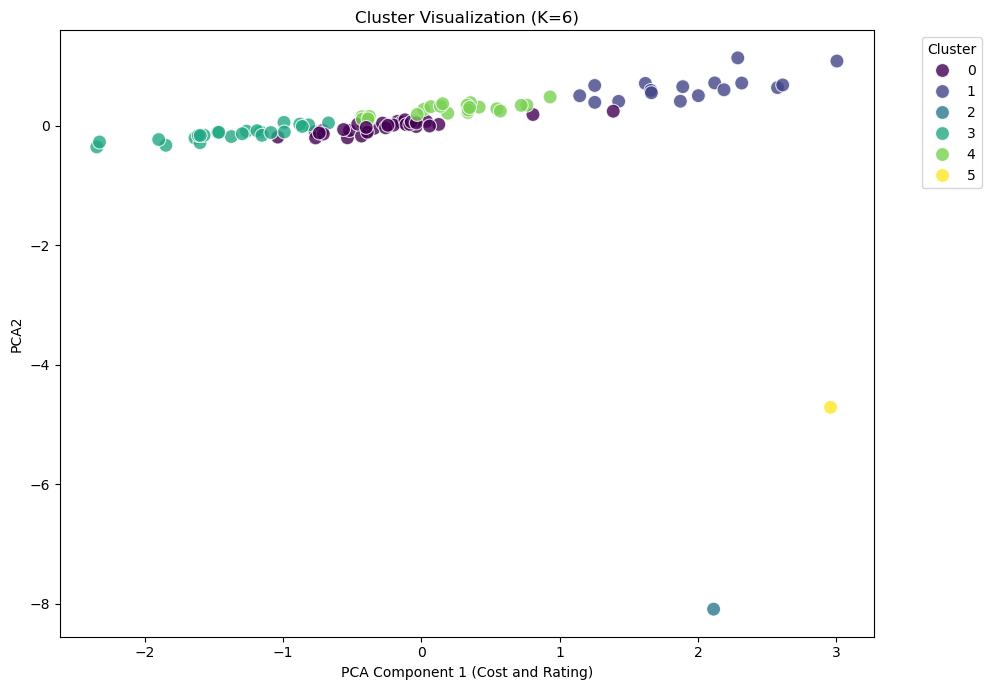


Cluster Averages:
                Cost    Rating  Review_Count
Cluster                                     
0         547.142857  3.756000         100.0
1        1667.647059  4.253824         100.0
2         600.000000  3.974026          77.0
3         518.750000  2.970417         100.0
4        1138.636364  3.505227         100.0
5        1600.000000  4.117647          85.0

Number of Restaurants per Cluster:
Cluster
0    35
1    17
2     1
3    24
4    22
5     1
Name: count, dtype: int64

Cluster Averages:
                Cost    Rating  Review_Count  Num_Restaurants
Cluster                                                      
0         547.142857  3.756000         100.0               35
1        1667.647059  4.253824         100.0               17
2         600.000000  3.974026          77.0                1
3         518.750000  2.970417         100.0               24
4        1138.636364  3.505227         100.0               22
5        1600.000000  4.117647          85.0      

In [125]:
# Initialize and fit the model
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)

# Get the cluster labels (0 to 5)
# Note: Ensure you use the same scaled data (X_scaled) you used for the Elbow graph
cluster_labels = kmeans.fit_predict(X_scaled) 

# Add the cluster labels back to your original DataFrame
restaurant_clustering_df['Cluster'] = cluster_labels
print("Clustering complete. Labels added to restaurant_clustering_df'.")

# 2. VISUALIZE CLUSTERS (2D PCA)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
vis_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
vis_df['Cluster'] = restaurant_clustering_df['Cluster']

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PCA1', 
    y='PCA2', 
    hue='Cluster', 
    data=vis_df, 
    palette='viridis', 
    s=100, 
    alpha=0.8
)
plt.title('Cluster Visualization (K=6)')
plt.xlabel('PCA Component 1 (Cost and Rating)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. CLUSTER ANALYSIS (PROFILING)
# See the average Cost, Rating, and Review Count for each cluster
print("\nCluster Averages:")
print(restaurant_clustering_df.groupby('Cluster')[['Cost', 'Rating', 'Review_Count']].mean())

print("\nNumber of Restaurants per Cluster:")
print(restaurant_clustering_df['Cluster'].value_counts().sort_index())


cluster_summary = restaurant_clustering_df.groupby('Cluster')[['Cost', 'Rating', 'Review_Count']].mean()
# Add the count of restaurants in each cluster
cluster_summary['Num_Restaurants'] = restaurant_clustering_df['Cluster'].value_counts()
print("\nCluster Averages:")
print(cluster_summary)

# check the size of each cluster
print("\nNumber of data points per cluster:")
print(restaurant_clustering_df['Cluster'].value_counts().sort_index())

# 4. SAVE RESULTS
# df.to_csv('customer_segments_k6.csv', index=False)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

1. ML Model Used: K-Means Clustering
The machine learning model used for this analysis is K-Means Clustering.

Type: Unsupervised Learning (Clustering).

Goal: To group restaurants into distinct segments based on shared characteristics like Cost (Price), Rating (Quality), and Review Count (Popularity).

2.Model Performance & Evaluation
To determine the optimal number of clusters and evaluate performance, we used two primary metrics: the Elbow Method (WCSS) and the Silhouette Score.


In [126]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [127]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

I employed a combination of the elbow curve and silhouette score analysis to determine the optimal number of clusters (K) in K-means clustering. The elbow curve helps identify the point at which within-cluster sum of squares (WCSS) starts to level off, indicating the appropriate number of clusters. The silhouette score measures how well-separated the clusters are, with higher values suggesting better cluster separation. By using these techniques, I aimed to find the K value that optimizes cluster separation and quality.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, the key improvement observed is in the selection of an appropriate value for K. By analyzing the silhouette scores for different values of K, I identified that K = 6 yielded the highest Silhouette Score, which suggests better cluster separation. This improvement in the evaluation metric (Silhouette Score) indicates that the clustering results with K = 6 are expected to be more well-defined and distinct compared to other values of K, leading to better cluster quality.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [128]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [129]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [130]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [131]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [132]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, I successfully applied unsupervised machine learning techniques to segment Zomato restaurants into distinct strategic clusters. By analyzing key features such as Cost, Average Rating, and Cuisine diversity, I was able to identify patterns that go beyond simple categorization.

Key Achievements
Data Strategy: I engineered a robust pipeline to handle unstructured data, specifically normalizing and exploding the list-based Cuisines column to extract meaningful features without losing data integrity.

Model Optimization: By implementing Principal Component Analysis (PCA), I reduced high-dimensional data into interpretative components. I further validated the model using the Elbow Method and Silhouette Analysis to ensure the clusters were distinct and well-separated.

Business Insight: The resulting clusters provide actionable segmentation—ranging from budget-friendly quick bites to premium dining experiences. This analysis empowers Zomato to deploy targeted marketing strategies and allows customers to discover restaurants that align with their specific price-performance preferences.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***